# Task 1 - Predictions using Supervised Machine Learning.

## Load Libraries will be used

In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

## Loading and inspecting the data

In [2]:
data = pd.read_csv(os.path.join("student_scores.csv"))
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


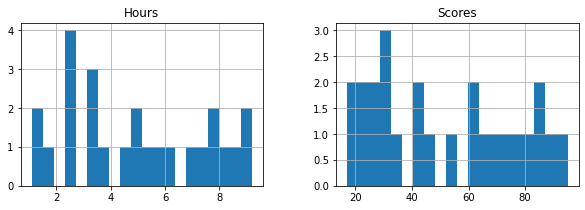

In [5]:
data.hist(figsize=(10, 3), bins=20);

## Data Modeling (Linear Regression)

$$\hat{y} = m x + b$$

$$MSE(\hat{y}, y) = \frac{1}{m} \sum (\hat{y} - y)^2$$

where $x$ is the input data, $m$ is slope $b$ is the bias term, and $\hat{y}$ is the prediction
### Splitting data into train and test

In [6]:
TEST_SIZE = 0.1
RANDOM_STATE = 42

X = data[["Hours"]]
y = data["Scores"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)
x_train.shape, x_test.shape

((22, 1), (3, 1))

In [7]:
scaler = StandardScaler()
scaler = scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
lr = LinearRegression()

lr = lr.fit(x_train, y_train)

print("LR Model Coef : ", lr.coef_)
print("LR Model Intercept : ", lr.intercept_)

LR Model Coef :  [23.7335876]
LR Model Intercept :  52.50000000000001


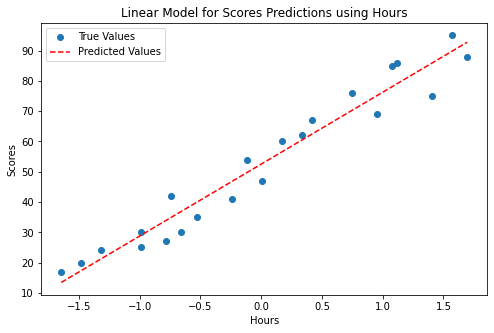

In [9]:
fit_data = np.array([x_train.min(), x_train.max()])
fit_line = lr.coef_ * fit_data + lr.intercept_

plt.figure(figsize=(8, 5))
plt.scatter(x_train.ravel(), y_train, label="True Values")
plt.plot(fit_data, fit_line.ravel(), color="r", linestyle="--", label="Predicted Values")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.title("Linear Model for Scores Predictions using Hours");

In [10]:
y_pred = lr.predict(x_test)

score = r2_score(y_test, y_pred)
print("R2 Score :", score)

R2 Score : 0.9740471287137089


In [11]:
mae_score = mean_absolute_error(y_test, y_pred)
print("MAE Score :", mae_score)

MAE Score : 3.9657593887812177


## Production Method using Sklearn Pipeline

In [12]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [13]:
y_pred = pipe.predict(x_test)

score = r2_score(y_test, y_pred)
print("R2 Score :", score)

R2 Score : 0.9740471287137089


In [14]:
mae_score = mean_absolute_error(y_test, y_pred)
print("MAE Score :", mae_score)

MAE Score : 3.9657593887812177


### Saving the Model

In [15]:
with open("lr_model.pkl", "wb") as f:
    pickle.dump(pipe, f)

!ls

 lr_model.pkl			  student_scores.csv
'Sol1. Linear Regression.ipynb'  'Task 1 - Supervised ML.ipynb'
